Saving semiconductor_materials_comparison.xlsx to semiconductor_materials_comparison.xlsx


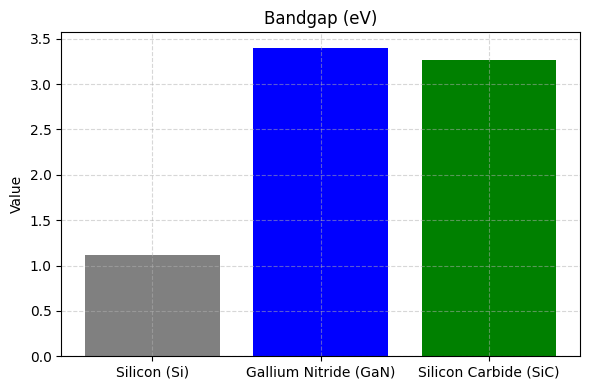

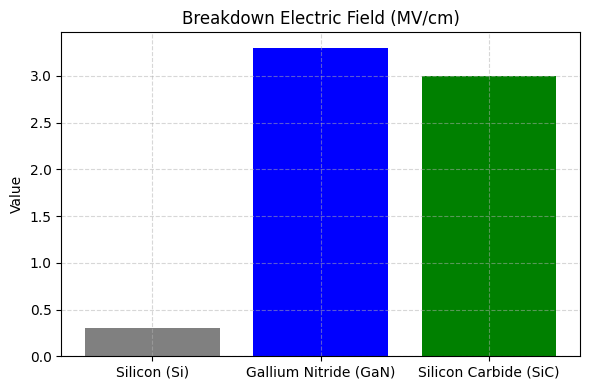

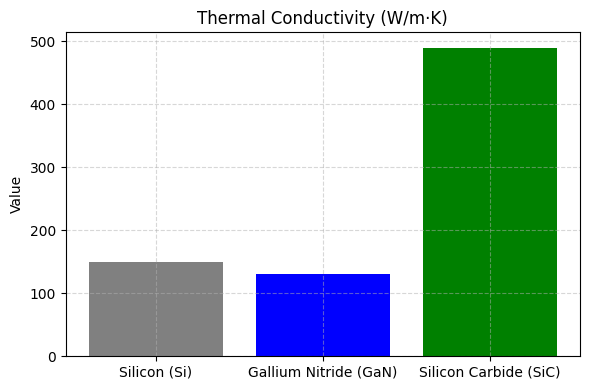

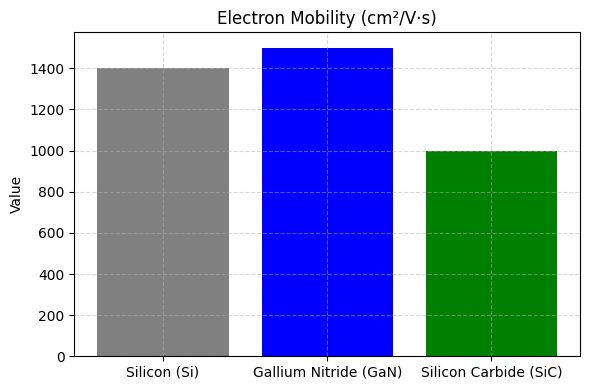

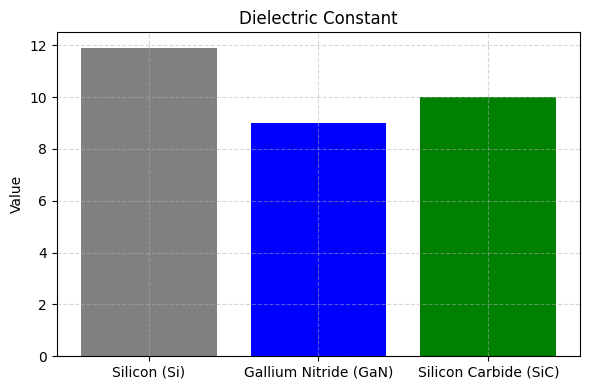

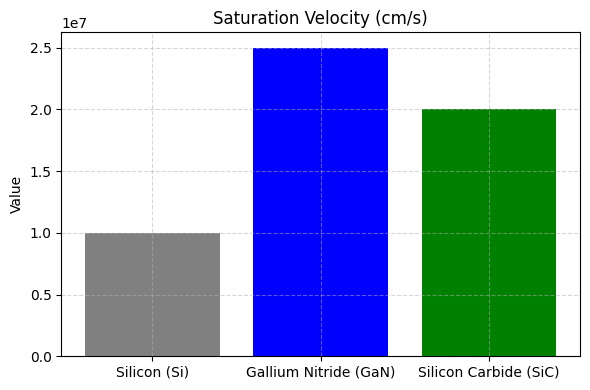

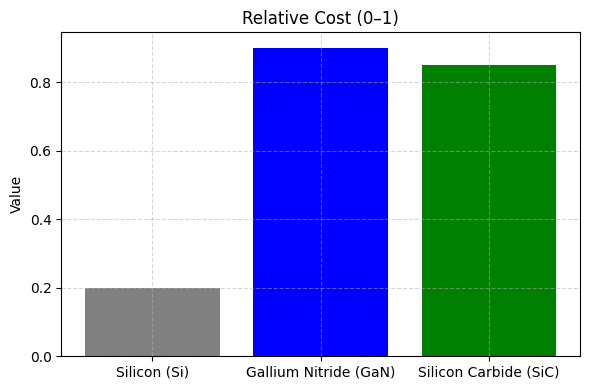

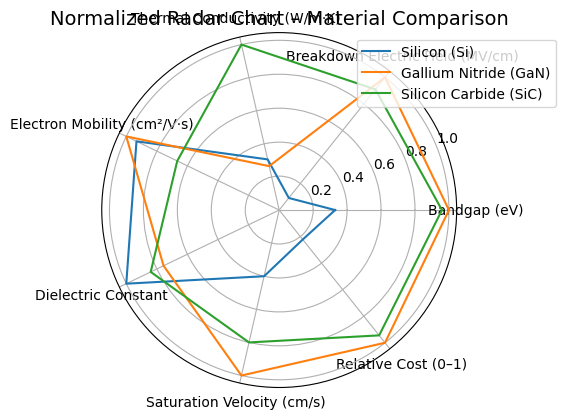

In [1]:
# Cài đặt thư viện nếu cần
!pip install matplotlib pandas openpyxl

# Bước 1: Đọc file Excel (sau khi upload trong Colab)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Tải file Excel lên (sử dụng thanh bên trái Colab hoặc đoạn này)
from google.colab import files
uploaded = files.upload()

# Bước 2: Đọc dữ liệu
df = pd.read_excel("semiconductor_materials_comparison.xlsx")

# Bước 3: Bar Chart cho từng thuộc tính
properties = df["Property"]
materials = df.columns[1:]

for i in range(len(properties)):
    plt.figure(figsize=(6, 4))
    values = df.iloc[i, 1:].values
    plt.bar(materials, values, color=["gray", "blue", "green"])
    plt.title(properties[i])
    plt.ylabel("Value")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Bước 4: Radar Chart (normalize và vẽ)
from math import pi

# Chuẩn hóa dữ liệu về 0–1 để vẽ radar chart
df_norm = df.copy()
for i in range(len(df)):
    max_val = df.iloc[i, 1:].max()
    df_norm.iloc[i, 1:] = df.iloc[i, 1:] / max_val

# Chuyển dữ liệu về dạng phù hợp
categories = list(df_norm["Property"])
N = len(categories)

# Lấy từng vật liệu
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # khép vòng

plt.figure(figsize=(6, 6))
for material in materials:
    values = df_norm[material].values.flatten().tolist()
    values += values[:1]
    plt.polar(angles, values, label=material)

plt.xticks(angles[:-1], categories, color='black', size=10)
plt.title("Normalized Radar Chart – Material Comparison", size=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()
